# Goal
Develop a linear regression model for the OilyGiant mining company that would analyze oil well parameters in each of the three selected regions and predict the volume of reserves in the new wells for each region;
Based on these predictions, pick the region with the highest total profit and the lowest risk of losses.

# Data description
Features

id — unique oil well identifier
f0, f1, f2 — three features of points (their specific meaning is unimportant, but the features themselves are significant)
Target

product — volume of reserves in the oil well (thousand barrels)

# Conditions:

- Only linear regression is suitable for model training (the rest are not sufficiently predictable).
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
- The budget for development of 200 oil wells is 100 USD million.
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
- The data is synthetic: contract details and well characteristics are not disclosed

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


pd.options.mode.chained_assignment = None   


In [11]:

    df0 = pd.read_csv('geo_data_0 (1).csv')
    df1 = pd.read_csv('geo_data_1.csv')
    df2 = pd.read_csv('geo_data_2.csv')
    

In [13]:
#Function  that shows data summary 
def summary(data):
    return data.head(3), data.info(),data.describe(include = 'all')

In [14]:
summary(df0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(      id        f0        f1        f2     product
 0  txEyH  0.705745 -0.497823  1.221170  105.280062
 1  2acmU  1.334711 -0.340164  4.365080   73.037750
 2  409Wp  1.022732  0.151990  1.419926   85.265647,
 None,
             id             f0             f1             f2        product
 count   100000  100000.000000  100000.000000  100000.000000  100000.000000
 unique   99990            NaN            NaN            NaN            NaN
 top      fiKDv            NaN            NaN            NaN            NaN
 freq         2            NaN            NaN            NaN            NaN
 mean       NaN       0.500419       0.250143       2.502647      92.500000
 std        NaN       0.871832       0.504433       3.248248      44.288691
 min        NaN      -1.408605      -0.848218     -12.088328       0.000000
 25%        NaN      -0.072580      -0.200881       0.287748      56.497507
 50%        NaN       0.502360       0.250252       2.515969      91.849972
 75%        NaN       1.

In [15]:
summary(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(      id         f0        f1        f2     product
 0  kBEdx -15.001348 -8.276000 -0.005876    3.179103
 1  62mP7  14.272088 -3.475083  0.999183   26.953261
 2  vyE1P   6.263187 -5.948386  5.001160  134.766305,
 None,
             id             f0             f1             f2        product
 count   100000  100000.000000  100000.000000  100000.000000  100000.000000
 unique   99996            NaN            NaN            NaN            NaN
 top      wt4Uk            NaN            NaN            NaN            NaN
 freq         2            NaN            NaN            NaN            NaN
 mean       NaN       1.141296      -4.796579       2.494541      68.825000
 std        NaN       8.965932       5.119872       1.703572      45.944423
 min        NaN     -31.609576     -26.358598      -0.018144       0.000000
 25%        NaN      -6.298551      -8.267985       1.000021      26.953261
 50%        NaN       1.153055      -4.813172       2.011479      57.085625
 75%        NaN     

In [16]:
summary(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


(      id        f0        f1        f2    product
 0  fwXo0 -1.146987  0.963328 -0.828965  27.758673
 1  WJtFt  0.262778  0.269839 -2.530187  56.069697
 2  ovLUW  0.194587  0.289035 -5.586433  62.871910,
 None,
             id             f0             f1             f2        product
 count   100000  100000.000000  100000.000000  100000.000000  100000.000000
 unique   99996            NaN            NaN            NaN            NaN
 top      VF7Jo            NaN            NaN            NaN            NaN
 freq         2            NaN            NaN            NaN            NaN
 mean       NaN       0.002023      -0.002081       2.495128      95.000000
 std        NaN       1.732045       1.730417       3.473445      44.749921
 min        NaN      -8.760004      -7.084020     -11.970335       0.000000
 25%        NaN      -1.162288      -1.174820       0.130359      59.450441
 50%        NaN       0.009424      -0.009482       2.484236      94.925613
 75%        NaN       1.1585

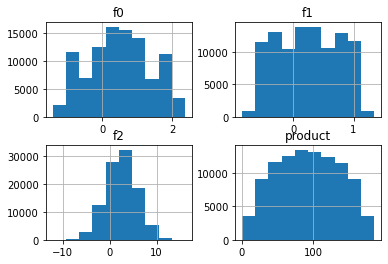

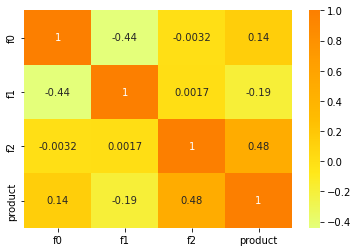

C:\Users\15594\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of product')

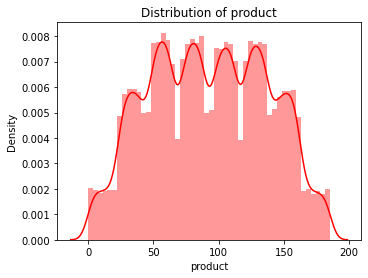

In [17]:
df0.hist()
corr = df0.corr()
plt.show()
sns.heatmap(corr, cmap = 'Wistia', annot= True);
plt.show()

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df0['product'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of product')

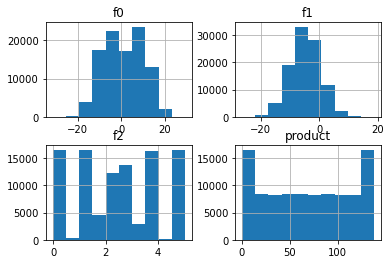

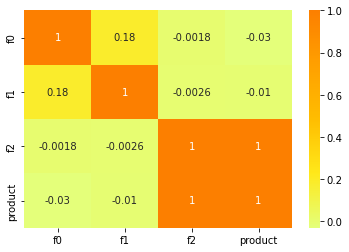

C:\Users\15594\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of product')

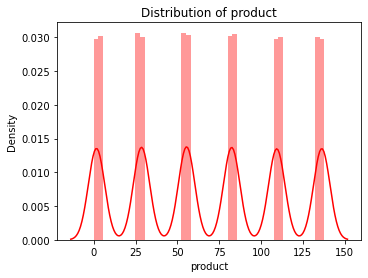

In [18]:
df1.hist()
corr = df1.corr()
plt.show()
sns.heatmap(corr, cmap = 'Wistia', annot= True);
plt.show()
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df1['product'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of product')

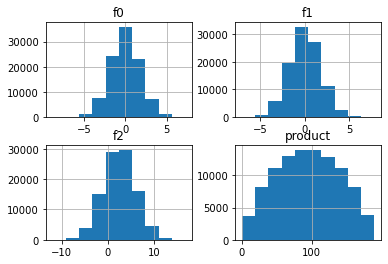

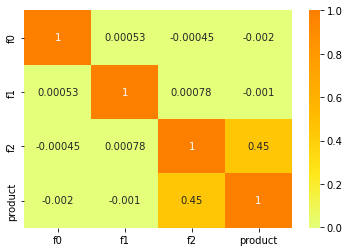

C:\Users\15594\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of product')

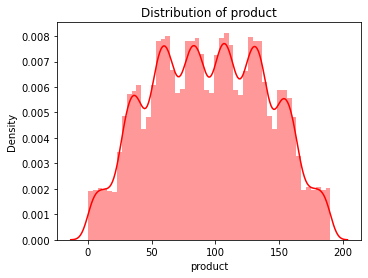

In [19]:
df2.hist()
corr = df2.corr()
plt.show()
sns.heatmap(corr, cmap = 'Wistia', annot= True);
plt.show()
#More Depth of our target varible 
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df2['product'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of product')


We can see the distrubtion is normal in both df2 and df0 but df1 - fs column and product columns are comb histogram.  We can see that there isnt any really meaningful correlation. Will leave dataframe as is 

# Model For Each region

Creating a model for each region 
- using a function it split the dataframe into X_train, X_valid, y_train, y_valid  
- Standard Scale the data, 
- Base line model using Dummy Regressor using the stragety "mean"
- Make a linear Regrisson Model
- Get the RMSE and Predicted Valid Mean 

This will be applied to each region 

In [20]:
def split_model(data):
    features = data.drop(columns =['id','product']) 
    target = data['product'] 
    X_train, X_valid,  y_train,y_valid = train_test_split(features,target, test_size = 0.25, random_state=12345)
    
    cols = list(X_train.columns)
    scaler = StandardScaler()
    X_train[cols] = scaler.fit_transform(X_train[cols])
    X_valid[cols] = scaler.transform(X_valid[cols])
    return X_train, X_valid,  y_train,y_valid

In [21]:
r0_Xtrain, r0_Xvalid, r0_ytrain, r0_yvalid = split_model(df0)
r1_Xtrain, r1_Xvalid, r1_ytrain, r1_yvalid = split_model(df1)
r2_Xtrain, r2_Xvalid, r2_ytrain, r2_yvalid = split_model(df2)

In [22]:


def model(X_train, X_valid,  y_train,y_valid):    
    base_model = DummyRegressor(strategy='mean')
    base_model.fit(X_train, y_train)
    y_prelim_pred = base_model.predict(X_valid)
    rmse_baseline = round(mean_squared_error(y_valid,y_prelim_pred)** 0.5,2)
    
    model = LinearRegression( )
    model.fit(X_train,y_train)
    
    predicted_valid = model.predict(X_valid)
    score = model.score(X_train,y_train)
    mse = mean_squared_error(y_valid, predicted_valid)
    rmse = round(mse ** 0.5, 2)
    predicted_valid_mean = round(predicted_valid.mean(),2)
    


    return model,rmse_baseline, rmse, predicted_valid_mean,predicted_valid

In [23]:
model_0, rmse_baseline_0, rmse_0, predicted_valid_0,*_ = model(r0_Xtrain, r0_Xvalid, r0_ytrain, r0_yvalid)
model_1, rmse_baseline_1, rmse_1, predicted_valid_1,*_ = model(r1_Xtrain, r1_Xvalid, r1_ytrain, r1_yvalid)
model_2, rmse_baseline_2, rmse_2, predicted_valid_2,*_ = model(r2_Xtrain, r2_Xvalid, r2_ytrain, r2_yvalid)

In [24]:
data = pd.DataFrame({'Region': 'Region_0',"Baseline_RMSE":rmse_baseline_0,'RMSE':rmse_0,'Average_volume':df0['product'].mean(),'Predicted_valid_mean': predicted_valid_0,},index=[0])

In [25]:
data.loc[len(data.index)] = ['Region_1',rmse_baseline_1 , rmse_1,df1['product'].mean(),predicted_valid_1,]

In [26]:
data.loc[len(data.index)] = ['Region_2',rmse_baseline_2 , rmse_2,df2['product'].mean(),predicted_valid_2,]

In [27]:
data.head()

,Region,Baseline_RMSE,RMSE,Average_volume,Predicted_valid_mean
0,Region_0,44.29,37.58,92.500,92.59
1,Region_1,46.02,0.89,68.825,68.73
2,Region_2,44.90,40.03,95.000,94.97


Each of our Baseline model RMSe are higer then our actual models. We can see that our predicted values are very close to the Average product  which is very good.

In [28]:
#The budget for development of 200 oil wells is 100 USD million.
budget = 100000000   
profit_wells = 200  
#revenue from one unit of product is 4,500 dollars
profit_from_one_product = 4500


In [29]:

cost_per_well = budget /profit_wells
print(f'Total cost per well is: ${cost_per_well}')

Total cost per well is: $500000.0


In [30]:
Met = budget/(profit_from_one_product*profit_wells )
print(f'Number of wells needed: {Met}')

Number of wells needed: 111.11111111111111


- The min value that is needed is 111.11 in order to break even.
- Between all regions we are losing money.  
- Region 2 is coming in first with the highest average 95 barrels 

# Calculate Profit from a set of selected oil wells and model predictions:

In [32]:
region_0 = pd.DataFrame()
region_0['predicted'] = model_0.predict(r0_Xvalid)
region_0['actual'] = r0_yvalid.values

region_1 = pd.DataFrame()
region_1['predicted'] = model_1.predict(r1_Xvalid)
region_1['actual'] = r1_yvalid.values

region_2 = pd.DataFrame()
region_2['predicted'] = model_2.predict(r2_Xvalid)
region_2['actual'] = r2_yvalid.values


In [33]:
#Create function to select best 200 wells from each region based on predictions.
def best_200(region_target, prediction,count):
    predictions_sorted = pd.Series(prediction, index=region_target.index).sort_values(ascending=False)
    top_target = region_target.loc[predictions_sorted.index][:count]
    return top_target

#Obtain top 200 wells per region and it's actual product value based on highest predicted value.
region_0_top = best_200(region_0['actual'],region_0['predicted'],200)
region_1_top = best_200(region_1['actual'],region_1['predicted'],200)
region_2_top = best_200(region_2['actual'],region_2['predicted'],200)


print(len(region_0_top))
print(len(region_1_top))
print(len(region_2_top))

200
200
200


In [34]:
#Create a function to calculate the potential profit from the top 200 wells by region.
def top_profit(region):
    profit = (((region.sum() * profit_from_one_product) - budget)/1000000 ).round(2)
    total_vol = (region.sum() / 1000).round(2)
    return profit, total_vol

display(pd.DataFrame([top_profit(region_0_top), top_profit(region_1_top), top_profit(region_2_top)], \
                   columns=['Profit (USD Million)', 'Barrels (Million)'], index= ['Region 0','Region 1','Region 2']))

,Profit (USD Million),Barrels (Million)
Region 0,33.21,29.60
Region 1,24.15,27.59
Region 2,27.10,28.25


In [35]:

def profit(region_vals):
    state = np.random.RandomState(12345)
    developement_cost = 100000000

    profit_range = []
    for i in range(10000):
        subsample = region_vals.sample(n=500, replace=True, random_state=state).sort_values('predicted', ascending=False).iloc[0:200,].actual
        revenue = subsample.sum() * 4500
        profit = revenue - developement_cost
        profit_range.append(profit)
    return profit_range


In [36]:
Regional_0 = pd.Series(profit(region_0))
Regional_1 = pd.Series(profit(region_1))
Regional_2 = pd.Series(profit(region_2))

Text(0.5, 1.0, ' Distribution of Profit')

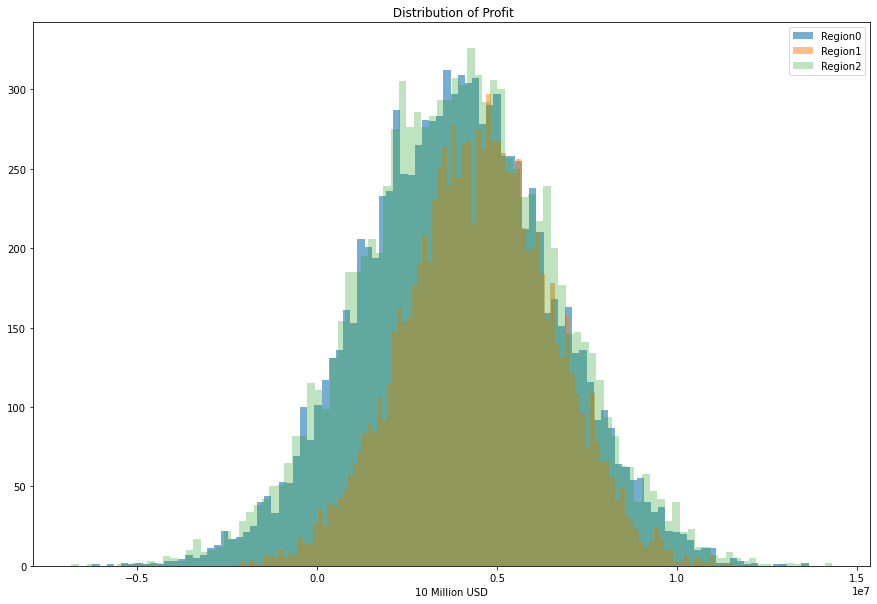

In [37]:
plt.figure(figsize=(15,10))
plt.hist(Regional_0, bins = 100,alpha=0.6,label = 'Region0')
plt.hist(Regional_1, bins = 100,alpha=0.5, label = 'Region1')
plt.hist(Regional_2, bins = 100,alpha=0.3,label = 'Region2')
plt.legend()
plt.xlabel('10 Million USD')
plt.title(' Distribution of Profit')

In [38]:
def risk_calculator(lower, upper, profit_range):
    lower = np.percentile(profit_range, lower)/10000000
    upper = np.percentile(profit_range, upper)/10000000
    return lower, upper

In [39]:
lower_r0, upper_r0 = risk_calculator(2.5, 97.5, Regional_0)
lower_r1, upper_r1 = risk_calculator(2.5, 97.5, Regional_1)
lower_r2, upper_r2 = risk_calculator(2.5, 97.5, Regional_2)

In [40]:
risk_r0 = round((Regional_0.sort_values(ascending=True) < 0).mean(),2)
risk_r1 = round((Regional_1.sort_values(ascending=True) < 0).mean(),2)
risk_r2 = round((Regional_2.sort_values(ascending=True) < 0).mean(),2)

In [41]:
avg_Regional_0  = round(Regional_0.mean()/100000000,2)
avg_Regional_1 = round(Regional_1.mean()/100000000,2)
avg_Regional_2  = round(Regional_2.mean()/100000000,2)

In [42]:
print(f'The Risk for Region0: {risk_r0} The lower border :{lower_r0} Upper Border: {upper_r0} Mean Profit: {avg_Regional_0 }')

The Risk for Region0: 0.07 The lower border :-0.12712959391539735 Upper Border: 0.9036523891107549 Mean Profit: 0.04


In [43]:
print(f'The Risk for Region1: {risk_r1} The lower border :{lower_r1} Upper Border: {upper_r1} Mean Profit:{avg_Regional_1}')

The Risk for Region1: 0.01 The lower border :0.051038978210651856 Upper Border: 0.8458642111016704 Mean Profit:0.05


In [44]:
print(f'The Risk for Region2: {risk_r2} The lower border :{lower_r2} Upper Border: {upper_r2} Mean Profit:{avg_Regional_2 }')

The Risk for Region2: 0.07 The lower border :-0.1371812891128915 Upper Border: 0.9296999742124811 Mean Profit:0.04


# Conclusion

In this project we have developed a linear regression model for the OilyGiant mining company that analyzes oil well parameters in each of the three selected regions and predicts the volume of reserves in the new wells for each region. Based on these predictions, we have identified the region with the highest total profit and the lowest risk of losses.

We have developed a model for each region. For that purpose we split the data into train and validation sets with the 75/25 proportion, respectively. Then we scaled it using the Standard Scaler method. Next, we calculated the baseline RMSE to be able to compare our models' score with a dummy regressor.

Each of the 3 models' RMSE turned out to be lower than the respective baseline RMSE

First, we calculated the volume of reserves sufficient for developing a new well without losses (a break-even point). The minimum volume of reserves per well in the new region must be 111.11 thousand barrels in order to break even.

Each of the 3 regions' average volume of predicted reserves is lower than this number. If we were to randomly take 200 wells in each region we would be at a loss, on average. To be able to make profit, let's select the most profitable wells in each region and see if the total reserves will cover the development cost.

In practice, instead of drilling all the wells in each region (and investing a lot of money in it), the company chooses 500 random wells, measure the features' values (f0, f1, f2) for each of them and then selects the best 200 wells for the profit calculation.

In conclusion, Region 1 is the best candidate for the future development of oil wells because it has the highest Mean profit and has the low risk as well.